In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
get_transforms?

In [5]:
tfms = get_transforms(do_flip=True,flip_vert=False,max_rotate=10.0,max_zoom=1.1,max_lighting=0.2,max_warp=0.2,p_affine=0.75,p_lighting=0.75)


In [6]:
np.random.seed(42)


In [7]:
# from pathlib import Path
# path = Path("train/")

# print(path)
# for c in data.classes:
#     print(c)
#     verify_images(path/c, delete=True)

In [8]:
src = (ImageList.from_folder(path='train',include=["class-811","class-394","class-526","class-4","class-536","class-204"]).split_by_rand_pct(0.2).label_from_folder())

In [9]:
src

LabelLists;

Train: LabelList (13359 items)
x: ImageList
Image (3, 1500, 2000),Image (3, 1500, 2000),Image (3, 2000, 1500),Image (3, 331, 500),Image (3, 500, 375)
y: CategoryList
class-204,class-204,class-204,class-204,class-204
Path: train;

Valid: LabelList (3339 items)
x: ImageList
Image (3, 375, 500),Image (3, 1500, 2000),Image (3, 375, 500),Image (3, 800, 600),Image (3, 500, 375)
y: CategoryList
class-204,class-204,class-536,class-536,class-204
Path: train;

Test: None

In [10]:
data = src.transform(tfms,size=(512,512)).databunch(bs=4).normalize(imagenet_stats)

In [11]:
data.c

6

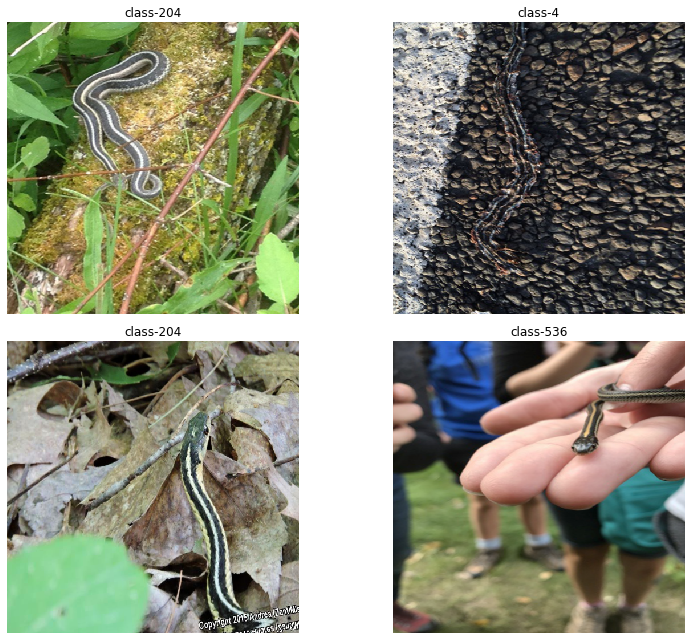

In [12]:
data.show_batch(rows=3, figsize=(12,9))

In [15]:
FBeta?

In [16]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')])


In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


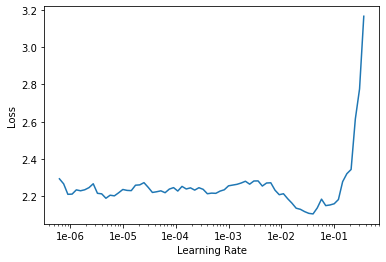

In [18]:
learn.recorder.plot()

In [19]:
lr=1e-2

In [20]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.289071,1.141942,0.359389,0.640611,0.000000,26:40
1,1.292663,207.544144,0.503444,0.496556,0.496556,26:18
2,1.356135,25.386526,0.478586,0.521414,0.521414,26:21
3,1.204926,11.033510,0.360886,0.639113,0.639113,26:16
4,1.067483,7.747989,0.382150,0.617850,0.617850,26:16


In [21]:
learn.fit_one_cycle(5,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.124635,12.371954,0.376759,0.623240,0.623241,26:20
1,1.161469,43.538296,0.386044,0.613956,0.613956,26:20
2,1.058734,16.788288,0.360288,0.639713,0.639712,26:17
3,0.994580,11.427116,0.353699,0.646301,0.646301,26:20
4,1.066176,46.894737,0.376460,0.623540,0.623540,26:13


In [ ]:
learn.fit_one_cycle(2,slice(1e-6,lr/10))

In [22]:
interp = ClassificationInterpretation.from_learner(learn)


In [23]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

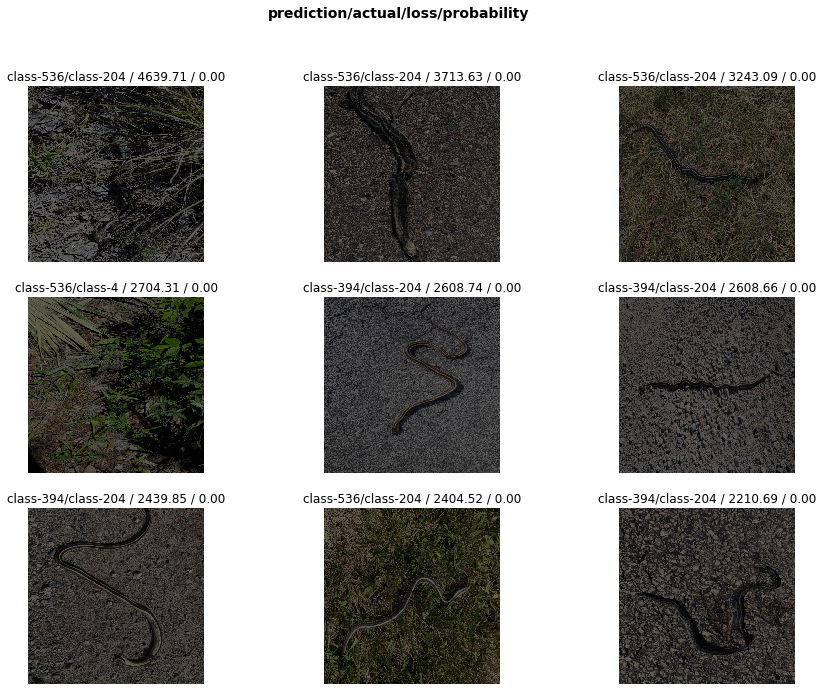

In [24]:
interp.plot_top_losses(9, figsize=(15,11))


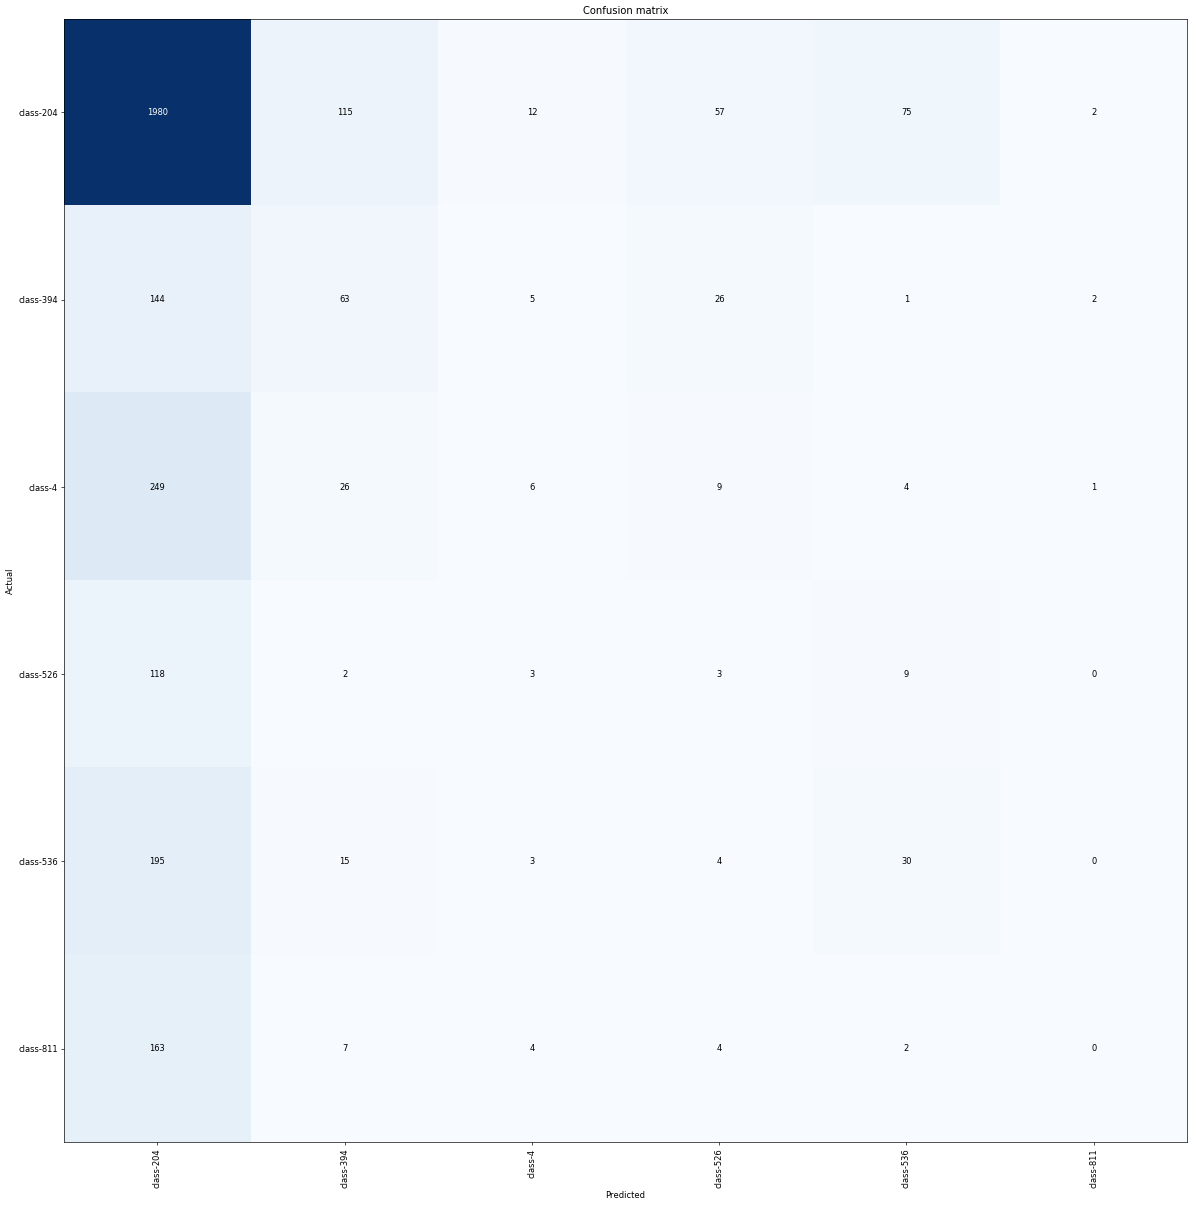

In [25]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)


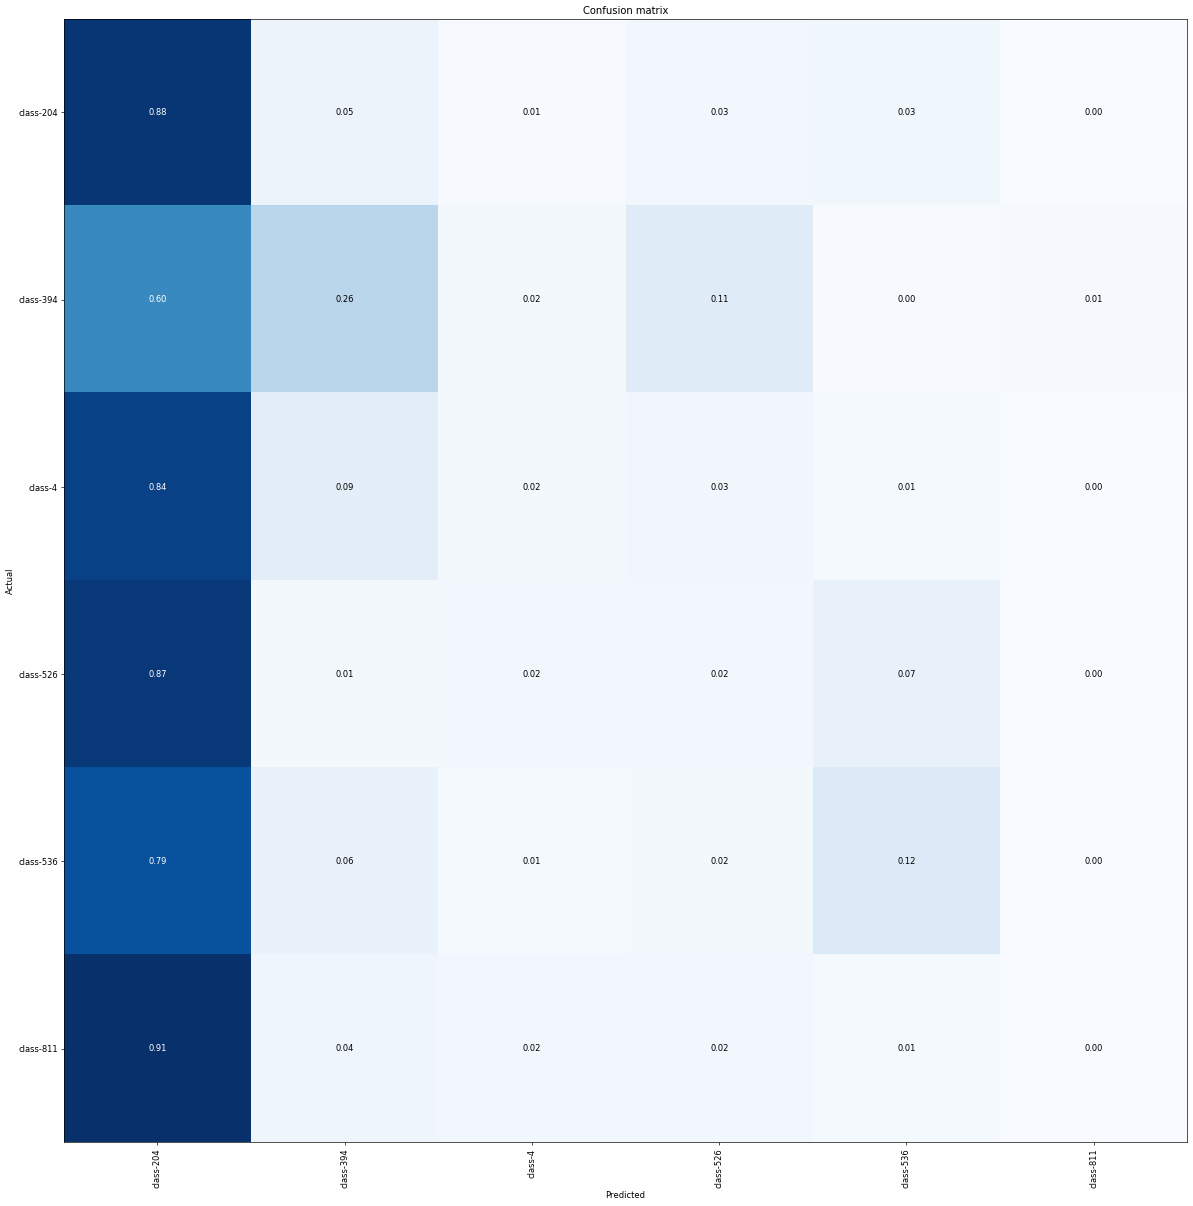

In [36]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60,normalize=True)

In [26]:
interp.most_confused(min_val=2)


[('class-4', 'class-204', 249),
 ('class-536', 'class-204', 195),
 ('class-811', 'class-204', 163),
 ('class-394', 'class-204', 144),
 ('class-526', 'class-204', 118),
 ('class-204', 'class-394', 115),
 ('class-204', 'class-536', 75),
 ('class-204', 'class-526', 57),
 ('class-394', 'class-526', 26),
 ('class-4', 'class-394', 26),
 ('class-536', 'class-394', 15),
 ('class-204', 'class-4', 12),
 ('class-4', 'class-526', 9),
 ('class-526', 'class-536', 9),
 ('class-811', 'class-394', 7),
 ('class-394', 'class-4', 5),
 ('class-4', 'class-536', 4),
 ('class-536', 'class-526', 4),
 ('class-811', 'class-4', 4),
 ('class-811', 'class-526', 4),
 ('class-526', 'class-4', 3),
 ('class-536', 'class-4', 3),
 ('class-204', 'class-811', 2),
 ('class-394', 'class-811', 2),
 ('class-526', 'class-394', 2),
 ('class-811', 'class-536', 2)]

In [27]:
data.c

6

In [28]:
data.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (13359 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-204,class-204,class-204,class-204,class-204
Path: train;

Valid: LabelList (3339 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
class-204,class-204,class-536,class-536,class-204
Path: train;

Test: None>

In [29]:
data.stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [33]:
len(data.train_ds)

13359